# 설정
## Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import platform
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 데이터 불러오기

In [3]:
member_data = pd.read_csv('Member_data02.csv')
product_data = pd.read_csv('Product_data.csv')
sales_data = pd.read_csv('Sales_data02.csv', low_memory=False)

## 미리보기
### 데이터프레임

In [181]:
product_data.head()

In [118]:
sales_data.head()

In [119]:
member_data.head()

### Plot

# 데이터 전처리
## 공백 삭제

In [4]:
#NaN 값이 포함된 모든 행을 삭제합니다.
member_data_2_1 = member_data.dropna(axis = 0)
# member_data_2_1

## 머지
### sales 와 member 머지

In [5]:
# Merge를 위한 형 변환
sales_data['고객번호'] = sales_data['고객번호'].astype('float')

In [6]:
df = pd.merge(sales_data, member_data, right_on='ID', left_on = '고객번호')
merge_outer = pd.merge(sales_data, member_data, right_on='ID', left_on = '고객번호', how = 'left')

In [842]:
# df
# merge_outer

In [7]:
merge_outer['ID'] = merge_outer['ID'].astype('str')

In [8]:
product_data['total'] = product_data['물품판매량'] * product_data['제품단가']

### product 를 머지

In [9]:
product = product_data[['물품대분류', '상품명', '제품단가']]

In [10]:
df = df.merge(product, on = ['물품대분류', '상품명'])

## 형 변환

In [11]:
df['배송시작일']=pd.to_datetime(df['배송시작일'],format = '%Y-%m-%d')
df['구매일']=pd.to_datetime(df['구매일'],format = '%Y-%m-%d')
df['배송완료일']=pd.to_datetime(df['배송완료일'],format = '%Y-%m-%d')

In [12]:
# Yes : 1, No : 0
df['자녀여부'] = df['자녀여부'].replace('Yes', 1).replace('No', 0)

In [13]:
# 여성 : 1, 남성 : 0
# 기혼 : 1, 미혼 : 0
# 출산예정 : 0
df['성별'] = df['성별']. replace('여', 1).replace('남', 0)
df['결혼유무'] = df['결혼유무'].replace('기혼', 1).replace('미혼', 0)
df['고객번호'].astype('float64')
df['구매시월령(수정)'] = df['구매시월령(수정)'].fillna(0)
# df[df['구매시월령(수정)'] < 0]

## 계산된 칼럼 추가
### 배송기간

In [14]:
df['배송기간'] = df['배송완료일'] -df['배송시작일']
df['구매에서 배송완료까지'] = df['배송완료일']- df['구매일']
df['배송시작기간'] = df['배송시작일'] - df['구매일']

df.drop(['주문번호', 'ID'], axis = 1, inplace = True)

## 월령 마이너스 문제해결?

In [15]:
def minus_change(i):
    if i < 0:
        return 0
    else:
        return i

df['구매시월령(수정)'] = df['구매시월령(수정)'].apply(minus_change)

# Plot

<AxesSubplot:>

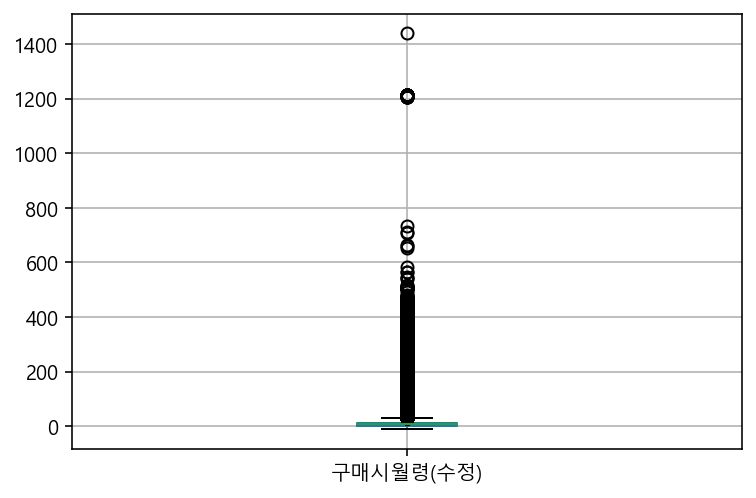

In [191]:
babymonth_boxplot = sales_data.boxplot(column = ['구매시월령(수정)'])
babymonth_boxplot

<AxesSubplot:xlabel='구매시월령(수정)', ylabel='Count'>

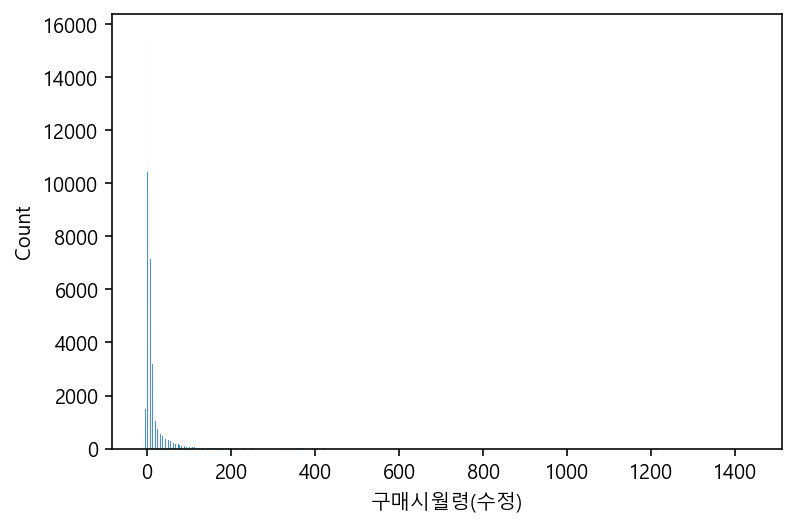

In [192]:
babymonth_histplot = sns.histplot(sales_data, x="구매시월령(수정)")
babymonth_histplot

In [249]:
df['물품대분류'].unique()

array(['더블하트', '팬티', 'FMC', '기저귀', '체험팩', 'FC', '기타', '물티슈', 'SKC', 'SrC'],
      dtype=object)

# 프레젠테이션

In [170]:
poham.to_excel('유아용품.xlsx')
mipoham.to_excel('유아용품 외.xlsx')
# kids.to_excel('키즈.xlsx')

In [172]:
poham.to_csv('유아용품.csv')
mipoham.to_csv('유아용품 외.csv')

In [174]:
mipoham['상품명'].count()

38556

## 유아용품 추출

In [16]:
# 상품명의 키워드를 기준으로 유아용품 분류
keyword = '유아|맘|모유|엄마|하기스|젖|아기|아가|베이비|콧물|그린핑거|핑크퐁|더블하트|누들앤부|출산|도담도담|드시모네|디어에코|라밀로우|리틀누|마마|마더|수유|맘마|매직캔|이유식|먼치킨|싸개|메릴린|몽슈레|신생아|유모차|턱받이|베베|보보앤부|본토이|브라이트|브리카|비박스|비츠|뽀드|뿌띠|쁘띠|치발기|페어리|야마토야|에르고|에불로보|오볼|원펀|율그란|카시트|필리앤|스페셜기프트SET|마밍|릴리유|굿나이트|키즈|듀플로'
poham = df[df['상품명'].str.contains(keyword)]
mipoham = df[~df['상품명'].str.contains(keyword)]

키워드를 구분한 기준은:
1. 그냥 딱 봐도 아기 관련된 키워드  
2. 브랜드명을 구글링 했을때, 상품 홍보이미지로 나오는 인물이 유아인가, 어린이인가?

## 대분류 제거

In [17]:
# list_4_2 = poham['물품대분류'].unique()
bigkind_count = pd.DataFrame()
list1 = df['물품대분류'].unique()
for a in list1:
    result1 = df['물품대분류'][df['물품대분류'] == a].count()
    bigkind_count.at[a,'df'] = result1
    result2 = poham['물품대분류'][poham['물품대분류'] == a].count()
    bigkind_count.at[a,'유아용품'] = result2

In [18]:
bigkind_count.astype(int)

,df,유아용품
더블하트,37228,37222
팬티,27581,27581
FMC,25950,1880
기저귀,35318,35238
체험팩,35390,35390
FC,12424,126
기타,7867,4872
물티슈,8446,8446
SKC,9365,9361
SrC,14,10


해석:   
모든 물품대분류에 유아용품이 들어간 것을 알 수 있다.  
FMC와 FC에는 그 비율이 낮으나 무시할 수 없는 숫자라는 개인적 의견이며,  
기타의 유아용품 비율은 3/4 정도로써, 비-유아용품이 많이 섞여있다는 것을 알 수 있다.  
따라서 물품대분류는 유아용품을 구분할 기준으로써 적합하지 않다!

## 재분류 칼럼 추가

In [19]:
#product_data에서 키워드를 포함하는 제품 리스트 추출
poham_pd = product_data[product_data['상품명'].str.contains(keyword)]
mipoham_pd = product_data[~product_data['상품명'].str.contains(keyword)]
poham_new = pd.DataFrame()
poham_df1 = poham_pd
poham_df1['재분류'] = ''

C:\Users\mrshi\AppData\Local\Temp\ipykernel_3712\2380216728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poham_df1['재분류'] = ''


In [20]:
# 재분류 할 키워드 목록
function = {'의약외품': '드시모네|열내림',
            '이유식': '이유식|맘마',
            '임신전후': '마더|맘스|출산|허그박스|니플',
            '가구': '야마토야|의자',
            '아기띠': '아기띠|에르고',            
            '살균기': '살균',
            '수유': '수유|모유|흡인기|유두보호기',
            '젖병': '젖병|젖꼭지브러쉬|젖꼭지 브러쉬|스파우트',
            '치발기': '치발|젖꼭지',            
            '물티슈': '콧물|물티슈|마이비데|릴리유',
            '화장지': '화장지',
            '차량용품': '카시트|차량|브리카',
            '유모차': '유모차',
            '장난감': '장난감|듀플로|피아노|핸드폰|스페셜기프트SET|뿌띠슈|본토이|브라이트|오볼|디즈니|베이비아인슈타인',
            '아기의류': '싸개|받이|배냇|외출용 필수 3종세트|스와들|양말|손수건|스카프|토시|덧신|슈즈|디어에코|내의|조끼|슈트|내복|장갑|목도리',
            '침구류': '방수요|베개|이불|블랭킷',
            '식기': '컵|스푼|몰드|플레이트|접시|식판|밀폐용기|식기|빨대브러쉬|빨대 브러쉬',
            '마스크': '마스크',
            '위생용품': '샴푸|로션|소독|리틀마마|오일|크림|손톱|유치브러쉬|면봉|핀셋|그린핑거|워시|손가락칫솔|손가락 칫솔',
            '기저귀': '기저귀|하기스',
            '안전': '보호대',
            '목욕': '샤워볼|타올|욕조|목욕놀이|목욕|탕온계',
            '세탁': '섬유',
            '악세서리': '헤어|머리핀|선글라스',
            '인형': '인형',
            '바운서': '바운서',
            '식품': '치즈|유기농',
            '물놀이': '보행기 튜브|슈즈|비치|선밤|선크림|선팩트|물놀이|물총',
            '팬티': '굿나이트'}

In [21]:
# for문 이용, 위의 딕셔너리를 키워드로 하나씩 분류한다.
test2 = pd.DataFrame()
for key, value in function.items():
    test1 = poham_df1[poham_df1['상품명'].str.contains(value)]
    index = list(test1.index)
    for a in index:
        test1.at[a,'재분류'] = key
        poham_df1 = poham_df1.drop(index=a)
    test2 = pd.concat([test1,test2])

In [22]:
# 미분류 된 상품명들도 "재분류" 칼럼 값을 입력해준다.
for a in list(poham_df1.index):
    poham_df1.at[a,'재분류'] = '미분류'

In [23]:
# 분류 완료된 DataFrame
poham_new = pd.concat([test2,poham_df1])
# poham_new

In [24]:
# 머지
product1 = poham_new[['물품대분류', '상품명', '재분류']]
df1 = df.merge(product1, on = ['물품대분류', '상품명'])

In [25]:
# poham_df1.sort_values(by='물품판매량', ascending=False)

In [841]:
# poham_pd[poham_pd['상품명'].str.contains('마그마그')]

## ipynb 정렬

## Plot

### 마진

In [26]:
df2 = df1.assign(구매금액_제품단가 = lambda x: (x['구매금액']-x['제품단가']))

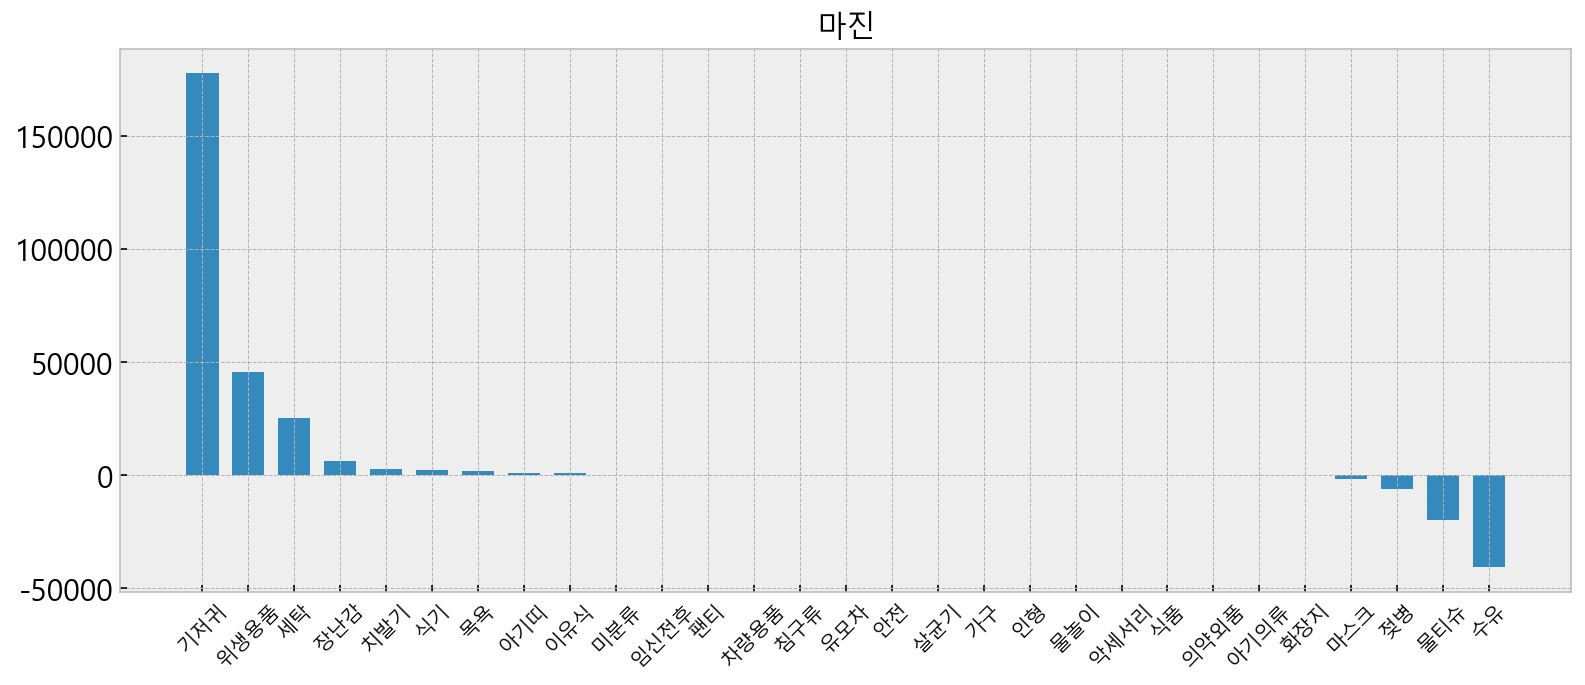

In [54]:
plt.figure(figsize=(13,5))
values = df2.groupby(['재분류'])['구매금액_제품단가'].sum().sort_values(ascending=False)
labels = values.index

plt.title('마진', fontdict={'fontsize':15})
plt.style.use('bmh')
margin = plt.bar(labels, values, width=0.7)
plt.xticks(rotation=45)
plt.yticks(fontsize=15)
# plt.grid(True, axis='x')
# plt.savefig('재분류 - 마진.png', dpi=300)
plt.show()

In [76]:
# df2[df2['재분류']!=labels1]['구매금액_제품단가'].sum()
df2[df2['재분류']!=labels1]['재분류'].unique()

array(['수유', '화장지', '임신전후', '치발기', '아기의류', '식기', '젖병', '물티슈', '위생용품',
       '목욕', '이유식', '세탁', '장난감', '마스크', '차량용품', '미분류', '의약외품', '물놀이',
       '식품', '팬티', '아기띠', '인형', '유모차', '악세서리', '침구류', '가구', '안전', '살균기'],
      dtype=object)

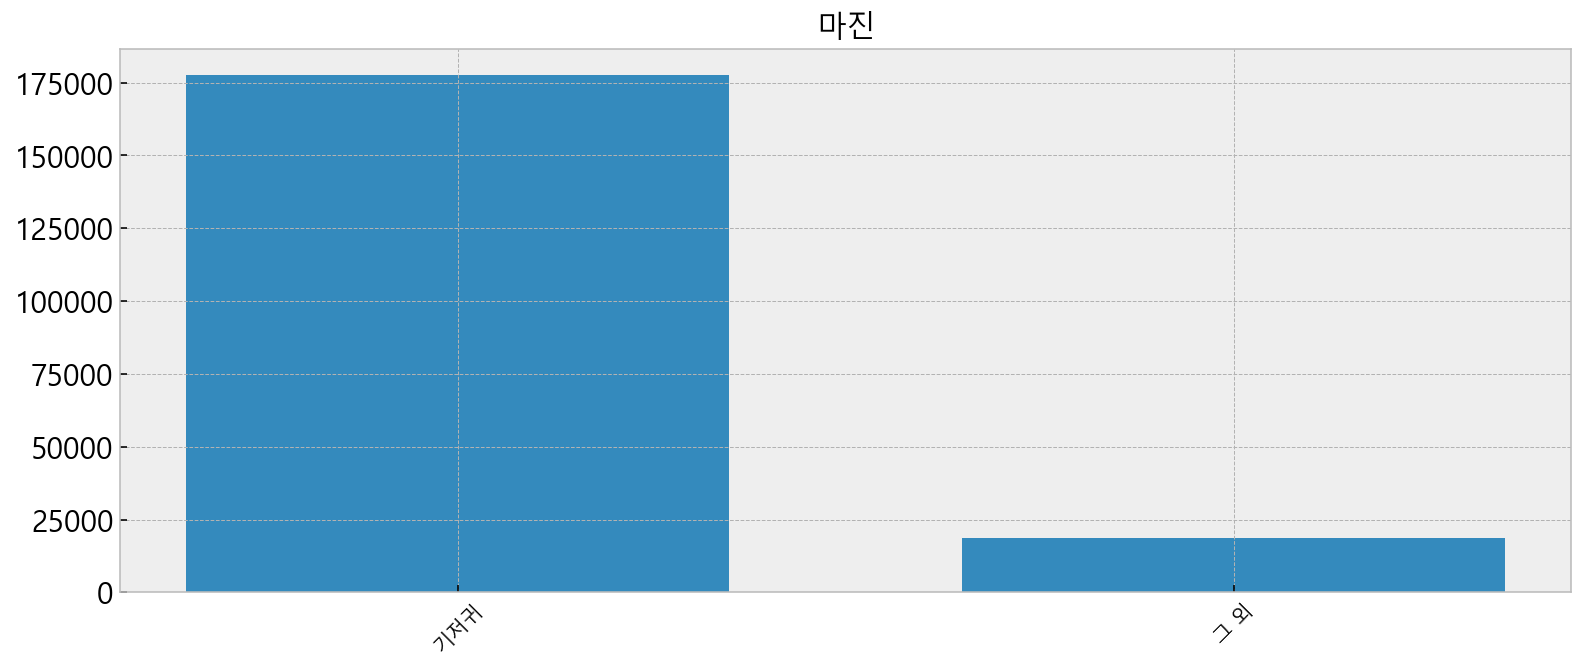

In [77]:
plt.figure(figsize=(13,5))

value1 = df2.groupby(['재분류'])['구매금액_제품단가'].sum().sort_values(ascending=False)[0]
labels1 = df2.groupby(['재분류'])['구매금액_제품단가'].sum().sort_values(ascending=False).index[0]
value2 = df2[df2['재분류']!=labels1]['구매금액_제품단가'].sum()
labels2 = '그 외'

plt.title('마진', fontdict={'fontsize':15})
plt.style.use('bmh')
margin2 = plt.bar([labels1,labels2], [value1,value2], width=0.7)
plt.xticks(rotation=45)
plt.yticks(fontsize=15)
# plt.grid(True, axis='x')
# plt.savefig('재분류 - 마진.png', dpi=300)
plt.show()

### 구매금액

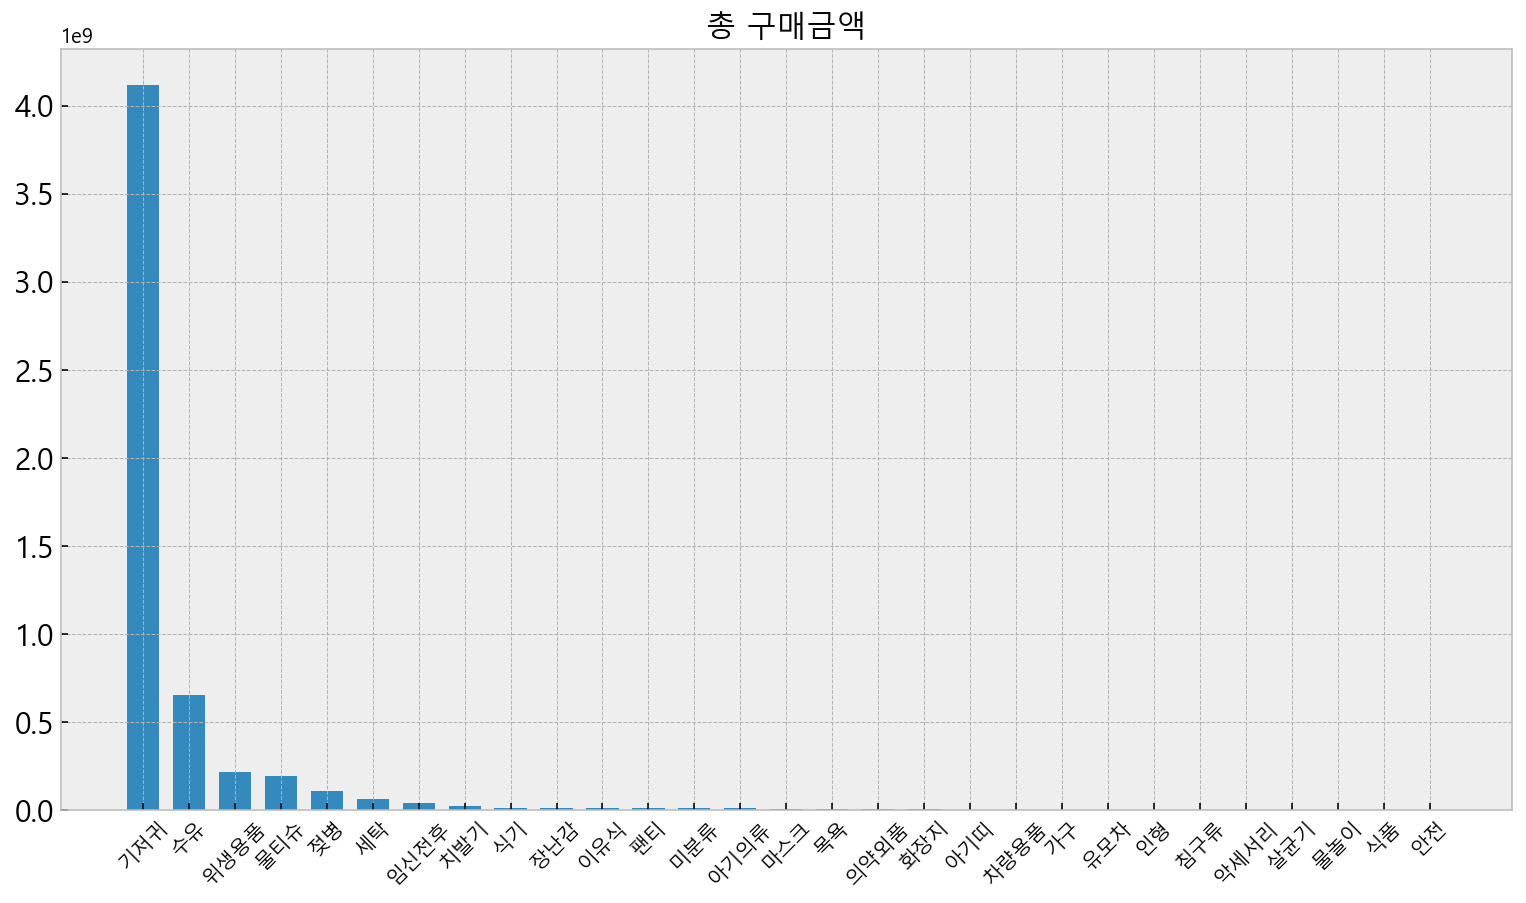

In [46]:
plt.figure(figsize=(13,7))
values = df2.groupby(['재분류'])['구매금액'].sum().sort_values(ascending=False)
labels = values.index

plt.title('총 구매금액', fontdict={'fontsize':15})
plt.style.use('bmh')
purchase_sum = plt.bar(labels, values, width=0.7)
plt.xticks(rotation=45)
plt.yticks(fontsize=15)
# plt.grid(True, axis='x')
plt.savefig('재분류 - 총 구매금액.png', dpi=300)
plt.show()

# 상위 10
purchase_top10 = values.index[0:10]

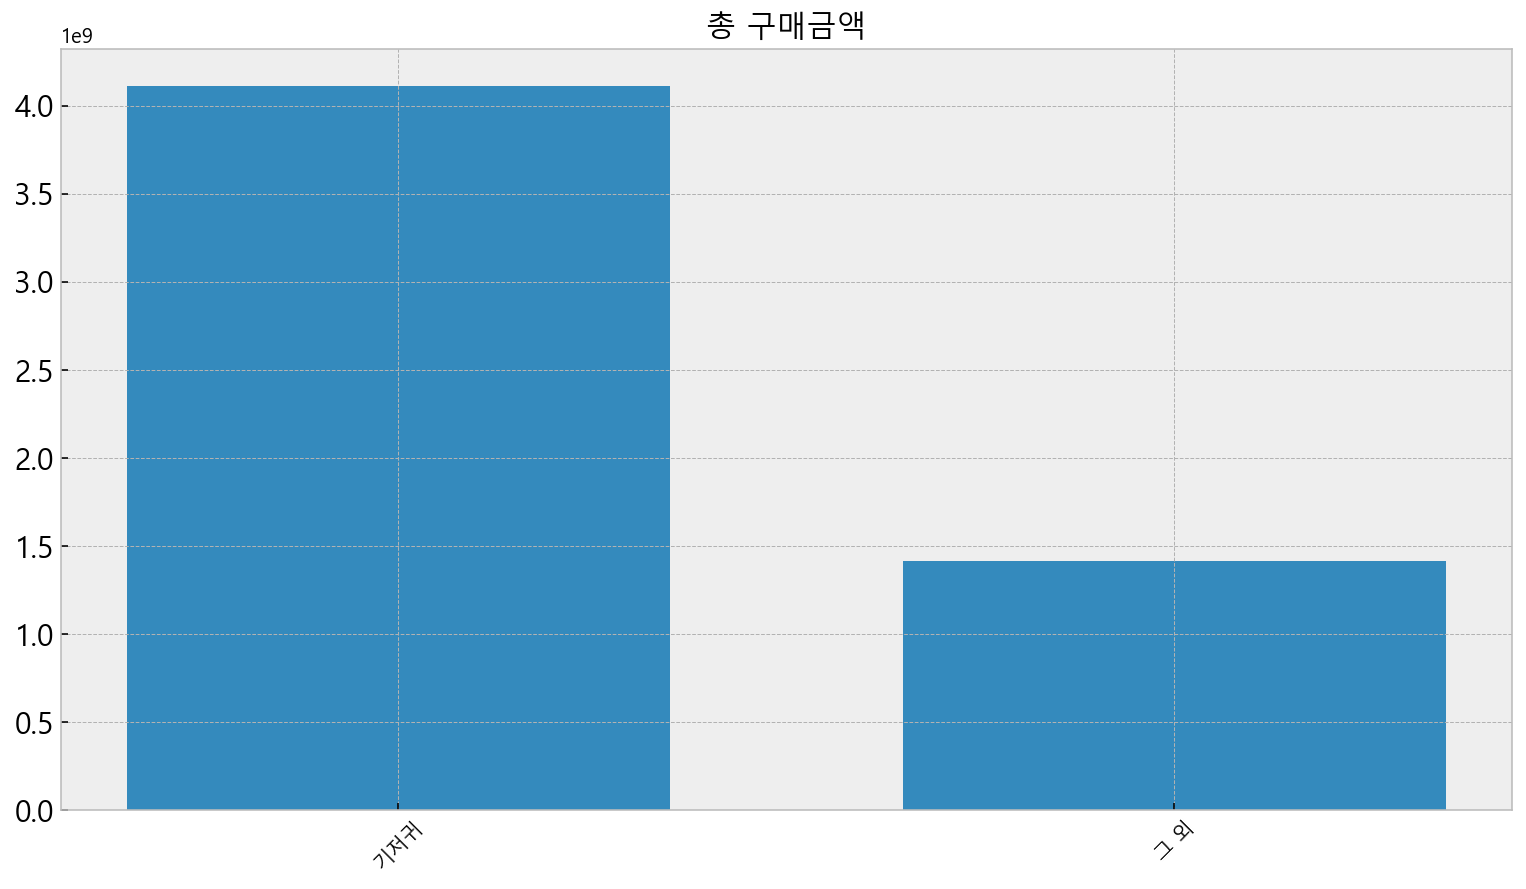

In [78]:
plt.figure(figsize=(13,7))

value1 = df2.groupby(['재분류'])['구매금액'].sum().sort_values(ascending=False)[0]
labels1 = df2.groupby(['재분류'])['구매금액'].sum().sort_values(ascending=False).index[0]
value2 = df2[df2['재분류']!=labels1]['구매금액'].sum()
labels2 = '그 외'

plt.title('총 구매금액', fontdict={'fontsize':15})
plt.style.use('bmh')
purchase_sum2 = plt.bar([labels1,labels2], [value1,value2], width=0.7)
plt.xticks(rotation=45)
plt.yticks(fontsize=15)
# plt.grid(True, axis='x')
plt.savefig('재분류 - 총 구매금액.png', dpi=300)
plt.show()

### 할인율 (구매금액-결제금액)

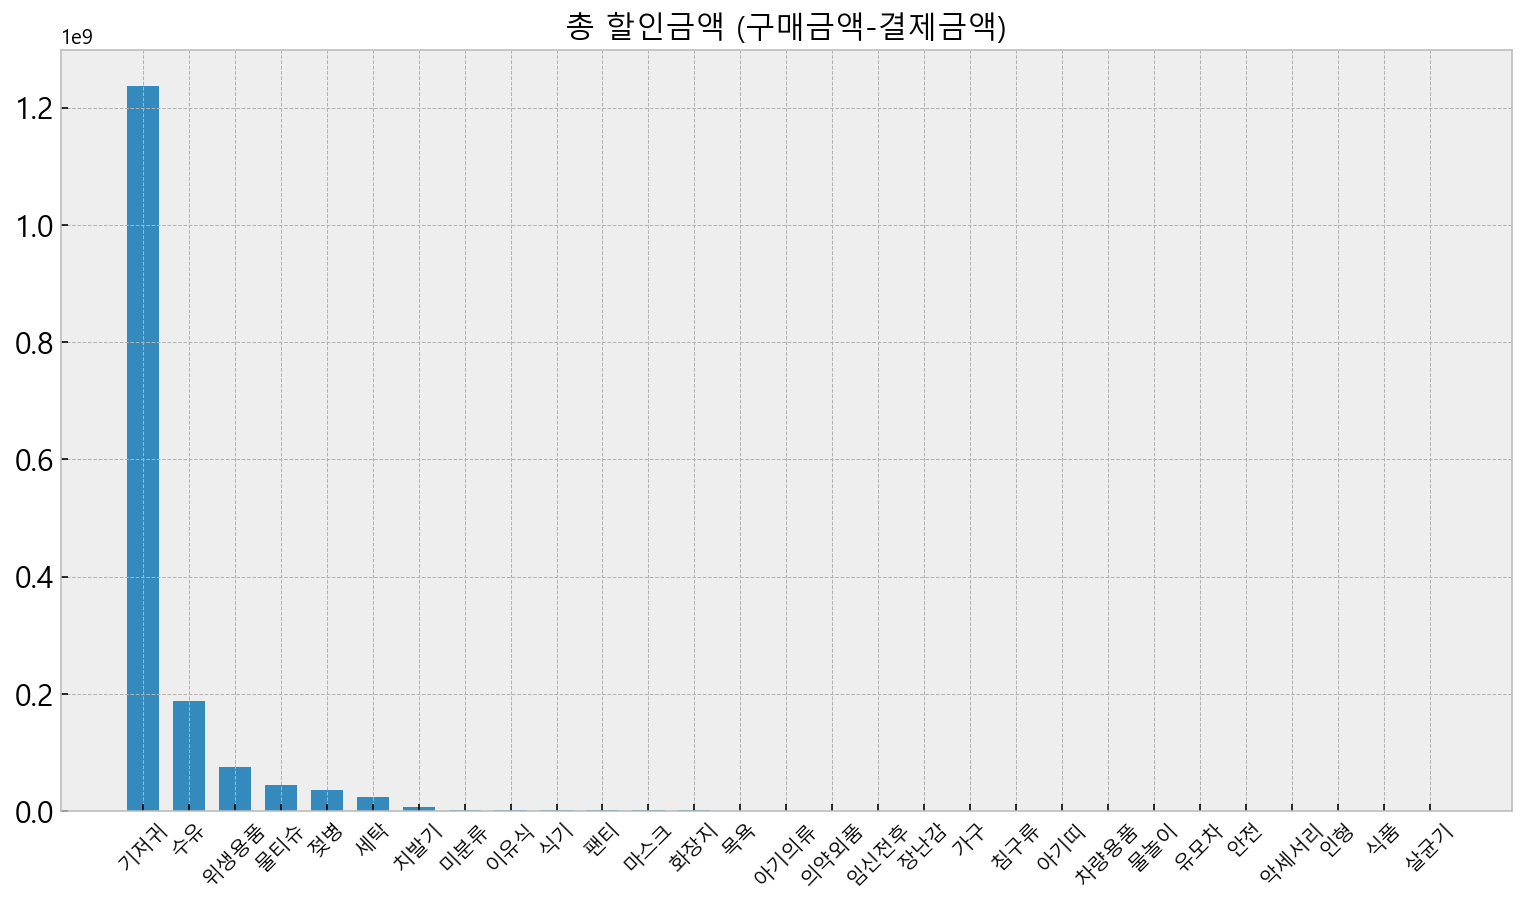

In [47]:
plt.figure(figsize=(13,7))
values = df2.groupby('재분류').apply(lambda df2,a,b: sum(df2[a] - df2[b]),'구매금액', '결제금액').sort_values(ascending=False)
labels = values.index

plt.title('총 할인금액 (구매금액-결제금액)', fontdict={'fontsize':15})
plt.style.use('bmh')
discount = plt.bar(labels, values, width=0.7)
plt.xticks(rotation=45)
plt.yticks(fontsize=15)
# plt.grid(True, axis='x')
plt.savefig('재분류 - 총 할인금액.png', dpi=300)
plt.show()

해석:  
구매금액과 할인금액의 그래프가 큰 차이를 보이지 않는다.  
품목에 대한 할인은 없다고 보여진다.

### 구매금액 변화 (1주 간격)

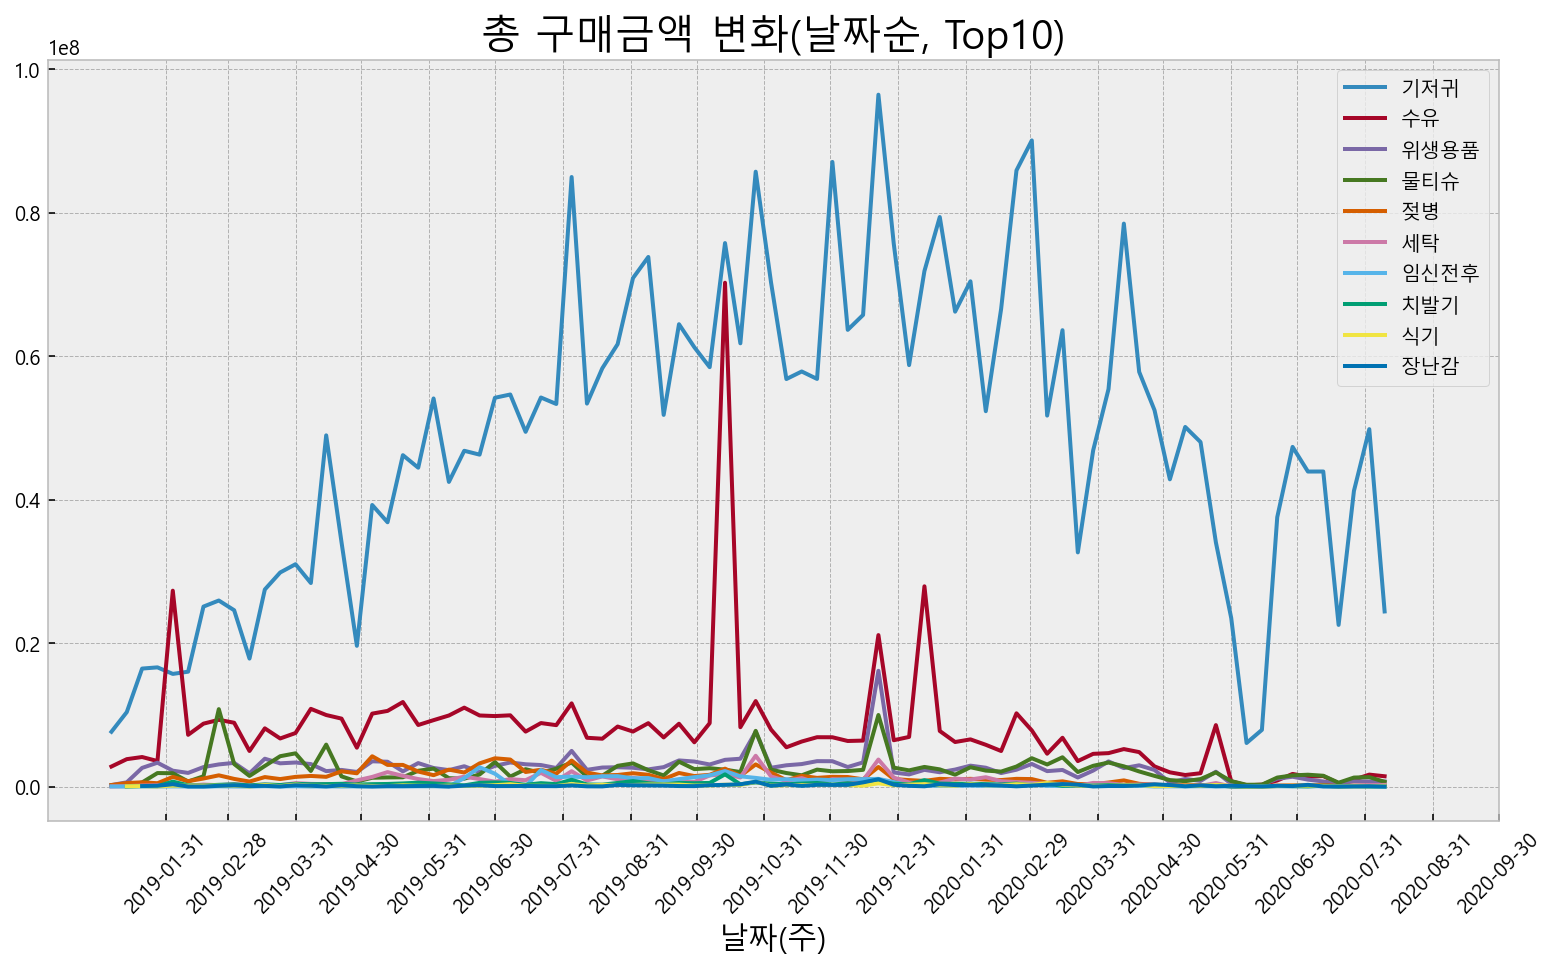

In [48]:
x = df2.groupby(pd.Grouper(key='구매일', freq='W'))['구매일'].count().index
y = df2.groupby(pd.Grouper(key='구매일', freq='W'))['구매금액'].sum()
week = pd.date_range('2019-01-01', '2020-10-01', freq='W').to_series()
month = pd.date_range('2019-01-01', '2020-10-01', freq='M').to_series()


plt.figure(figsize=(13,7))
plt.title('총 구매금액 변화(날짜순, Top10)', fontdict={'fontsize':20})
for a in purchase_top10:
    x = df2[df2['재분류'] == a].groupby(pd.Grouper(key='구매일', freq='W'))['구매일'].count().index
    y = df2[df2['재분류'] == a].groupby(pd.Grouper(key='구매일', freq='W'))['구매금액'].sum()
    plt.plot(x,y, label=a)
plt.xticks(month, rotation=45)
plt.xlabel('날짜(주)',fontdict={'fontsize':15})
plt.legend()
plt.savefig('재분류 - 날짜별 결제금액.png', dpi=300)
plt.show()

In [ ]:
#Stacked Bar 차트

labels = df2.groupby(['재분류'])['구매금액'].sum().sort_values(ascending=False)
x1 = spec_2['0']
x2 = spec_2['1']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(labels, x1, width, label='불량', color='#FD6F22')
ax.bar(labels, x2, width, bottom=x1, label='양품', color='#000A3E')
#ax.set_xticklabels(labels, rotation=45)

#ax.set_ylabel('Scores')
ax.set_title('SPEC별 생산량과 불량 수', size=25)
ax.legend()

plt.style.use('ggplot')
#plt.figure(figsize=(15,7))
#plt.bar(bc1_labels, bc1_values, width=0.7)
#plt.set_xlabel(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 100, step=5))
plt.margins(0.01)
plt.grid(True, axis='y')
plt.show()
fig.savefig("six_project_2.5.1_plot.png", dpi=300)

In [ ]:
plt.figure(figsize=(13,7))
values = df2.groupby('재분류').apply(lambda df2,a,b: sum(df2[a] - df2[b]),'구매금액', '결제금액').sort_values(ascending=False)
labels = values.index

plt.title('총 할인금액 (구매금액-결제금액)', fontdict={'fontsize':15})
plt.style.use('bmh')
discount = plt.bar(labels, values, width=0.7)
plt.xticks(rotation=45)
plt.yticks(fontsize=15)
# plt.grid(True, axis='x')
plt.savefig('재분류 - 총 할인금액.png', dpi=300)
plt.show()

# 계산 공간

In [82]:
df2['']

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,재분류,구매금액_제품단가
0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,37.0,국민은행,인스타그램,1,20583,4 days,5 days,1 days,수유,5217
1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days,수유,5217
2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,32.0,농협중앙회,네이버카페,1,20583,3 days,4 days,1 days,수유,5217
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days,수유,-7683
4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days,수유,-7683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160121,2020-05-22,2020-05-23,2020-05-27,6.0,2.019122e+14,10900,10900,기타,[실리만] 젖병 집게 WSB214,0,...,35.0,농협회원조합,인스타그램,1,10900,4 days,5 days,1 days,젖병,0
160122,2020-05-16,2020-05-17,2020-05-19,9.0,2.019123e+14,4900,4900,체험팩,(하기스위크) 2020 하기스 매직 컴포트 3단계 공용 20매(밴드형/체험팩) (EA),1,...,32.0,롯데카드,인스타그램,1,4900,2 days,3 days,1 days,기저귀,0
160123,2020-05-16,2020-05-17,2020-05-19,9.0,2.019123e+14,0,0,체험팩,(하기스위크) 하기스 샘플러 3단계 여아(밴드형) 3종 + 매직팬티 컴포트 20매 증정,1,...,32.0,롯데카드,인스타그램,1,0,2 days,3 days,1 days,기저귀,0
160124,2020-07-01,2020-07-02,2020-07-04,5.0,2.019123e+14,6800,6730,더블하트,더블하트 노리개젖꼭지 2단계(핑크) (EA),1,...,34.0,국민은행,지인추천,1,6800,2 days,3 days,1 days,치발기,0


In [178]:
# sales_data.isnull().sum()

In [177]:
# product_data[product_data['제품단가'] == 0]

In [122]:
sales_data['주문번호'].nunique()

182426

In [123]:
sac = sales_data[sales_data['주문번호'].str.contains('-')]

In [124]:
sac['고객번호'].nunique()

13185

In [183]:
buy_day = sales_data.sort_values(by = '구매일')

In [180]:
# member_data.groupby('유입경로').agg(where = ('자녀여부', 'count'))

In [127]:
# sales_data['구매시월령(수정)'] =  sales_data['구매시월령(수정)'] // 12 +1 -> 나이로 바꾸고 싶을떄

In [129]:
sales_data['구매시월령(수정)'][0]

4.0

In [193]:
# 구매 시 월령 8살 이상
# over_ = sales_data[sales_data['구매시월령(수정)'] >= 8]
# over_

In [148]:
no_outer = merge_outer[merge_outer['자녀여부'] == 'No']
yes_outer = merge_outer[merge_outer['자녀여부'] == 'Yes']

In [146]:
product_data['total'].max()

194683790

In [141]:
member_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81094 entries, 0 to 81093
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      81094 non-null  float64
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.6+ MB


In [140]:
member_data

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No
4,2.018123e+14,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,2.019123e+14,여,기혼,경기,31.0,국민은행,오픈마켓,Yes
81090,2.019123e+14,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes
81091,2.019123e+14,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,2.019123e+14,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


In [137]:
product_data[product_data['물품대분류'] == 'FMC']

,물품대분류,상품명,물품판매량,제품단가
255,FMC,(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...,30,0
256,FMC,(1+1) 크리넥스 버블버블 핸드워시 상큼향 거품펌프형 250ml + 용기형리필 2...,17,0
257,FMC,(핫딜위크/1+1) 스카트 주방 위생 세트,12,0
258,FMC,(핫딜위크/1+1) 크리넥스 칼로리라이트 키친타월 55매 X 3롤,6,0
259,FMC,[1+1] 스카트 항균 프레쉬블루 빨아쓰는 행주타월 45매 X 4롤,30,24800
...,...,...,...,...
475,FMC,크리넥스 황사마스크 뉴디자인플러스 대형 3P,209,11866
476,FMC,크리넥스 황사마스크 뉴디자인플러스 소형 3P,309,16037
477,FMC,크리넥스 황사용 마스크 플러스 대형10P,222,19871
478,FMC,크리넥스/스카트 세트,54,38100


In [128]:
sales_data['구매시월령(수정)'].describe()

count    168142.000000
mean         14.845458
std          38.521315
min         -10.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        1439.000000
Name: 구매시월령(수정), dtype: float64

In [132]:
sales_data['구매시월령(수정)'].describe()

count    168142.000000
mean         14.845458
std          38.521315
min         -10.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        1439.000000
Name: 구매시월령(수정), dtype: float64

In [131]:
sales_data[sales_data['고객번호'] == '201812310749770']

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
